In [1]:
# %load ../notebooks/init.ipy
%reload_ext autoreload
%autoreload 2

# Builtin packages
from datetime import datetime
from importlib import reload
import logging
import os
from pathlib import Path
import sys
import warnings

# standard secondary packages
import astropy as ap
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats
import tqdm.notebook as tqdm

# development packages
import kalepy as kale
import kalepy.utils
import kalepy.plot

# --- Holodeck ----
import holodeck as holo
import holodeck.sam
from holodeck import cosmo, utils, plot
from holodeck.constants import MSOL, PC, YR, MPC, GYR, SPLC, NWTG
import holodeck.gravwaves
import holodeck.evolution
import holodeck.population

# Silence annoying numpy errors
np.seterr(divide='ignore', invalid='ignore', over='ignore')
warnings.filterwarnings("ignore", category=UserWarning)

# Plotting settings
mpl.rc('font', **{'family': 'serif', 'sans-serif': ['Times'], 'size': 15})
mpl.rc('lines', solid_capstyle='round')
mpl.rc('mathtext', fontset='cm')
mpl.style.use('default')   # avoid dark backgrounds from dark theme vscode
plt.rcParams.update({'grid.alpha': 0.5})

# Load log and set logging level
log = holo.log
log.setLevel(logging.INFO)

In [64]:
_pspace = pspace

In [70]:
fobs_cents, fobs_edges = holo.librarian.get_freqs(None)
print(fobs_cents.shape, fobs_edges.shape)

NSAMP = 100
SHAPE = 30
# pspace = holo.param_spaces.PS_Uniform_07A_Rot_Test(log, NSAMP, SHAPE, None)
# pspace.param_samples = _pspace.param_samples

ii = np.random.choice(pspace.nsamples)
ii = 1
print(f"{ii=}")
rot = pspace.param_samples[ii, -1]
print(f"{rot=}")

sam, hard = pspace(ii)
# print(hard)
print(hard._gamma_inner, hard._gamma_outer)
print(hard._gamma_inner-rot, hard._gamma_outer-rot)


(40,) (41,)
ii=1
rot=0.39153722534013335
-0.6084627746598666 1.8915372253401332
-1.0 1.5


In [75]:
nums = [46, 70]
gwbs = []
hards = []
for ii in nums:
    rot = pspace.param_samples[ii, -1]
    print(ii, rot)
    sam, hard = pspace(ii, sam_shape=60)
    print(hard)
    
    # ttime = hard._target_time
    # rchar = hard._rchar
    # sepa_init = hard._sepa_init
    ttime = 1.0 * GYR
    rchar = 10.0 * PC
    sepa_init = 1e3 * PC
    
    hard = holo.hardening.Fixed_Time_2PL_SAM(
        sam, ttime, rchar=rchar, sepa_init=sepa_init, gamma_inner=hard._gamma_inner, gamma_outer=hard._gamma_outer
    )
    print(hard)
    
    hards.append(hard)
    print(hard._gamma_inner, hard._gamma_outer)
    print(hard._gamma_inner-rot, hard._gamma_outer-rot)
    _gwb = sam.new_gwb(fobs_edges, hard)
    gwbs.append(_gwb)
    

46 -0.45714525276916423
<holodeck.hardening.Fixed_Time_2PL_SAM object at 0x17ee4bfd0> :: target_time/Gyr=1.58e+00 num_steps=300 sepa_init/pc=1.00e+04 rchar/pc=1.00e+02 gamma_inner=-1.46e+00 gamma_outer=1.04e+00 
<holodeck.hardening.Fixed_Time_2PL_SAM object at 0x17ee49f90> :: target_time/Gyr=1.00e+00 num_steps=300 sepa_init/pc=1.00e+03 rchar/pc=1.00e+01 gamma_inner=-1.46e+00 gamma_outer=1.04e+00 
-1.4571452527691642 1.0428547472308358
-1.0 1.5
22:40:29 INFO : Stalled SAM bins based on GMT: 1.62e+05/2.16e+05 = 7.52e-01 [sam.py:static_binary_density]
22:40:29 INFO : Adding MMbulge scatter (3.0000e-01) [sam.py:static_binary_density]
22:40:29 INFO : 	dens bef: (0.00e+00, 7.62e-183, 3.23e-35, 1.80e-05, 9.63e-04, 4.52e-03, 2.76e-02) [sam.py:static_binary_density]
22:40:34 INFO : Scatter added after 5.628063 sec [sam.py:static_binary_density]
22:40:34 INFO : 	dens aft: (3.68e-29, 8.89e-15, 7.94e-10, 4.50e-05, 1.40e-03, 5.42e-03, 2.11e-02) [sam.py:static_binary_density]
22:40:34 INFO : 	mass: 

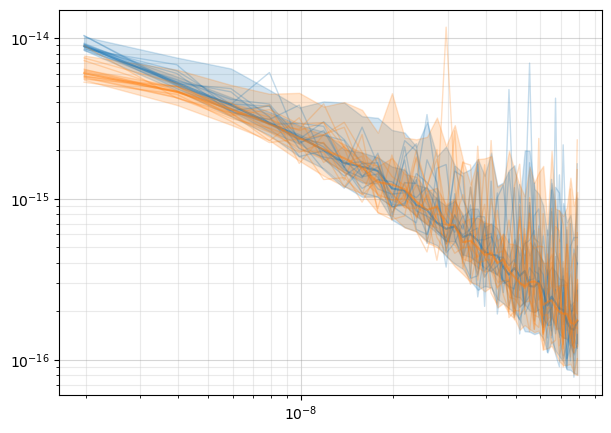

In [76]:
fig, ax = plot.figax()
plot.draw_gwb(ax, fobs_cents, gwbs[0])
plot.draw_gwb(ax, fobs_cents, gwbs[1])
plt.show()

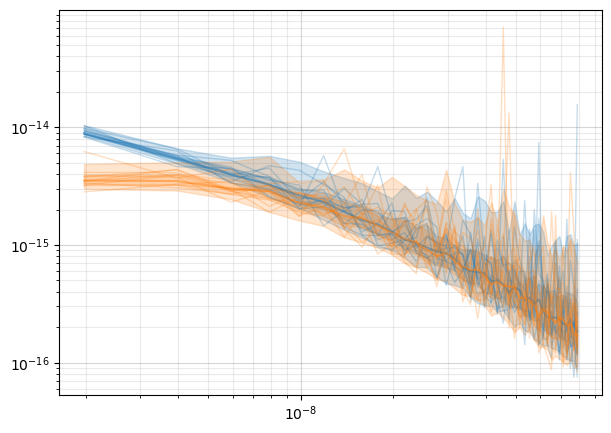

In [ ]:
fig, ax = plot.figax()
plot.draw_gwb(ax, fobs_cents, gwbs[0])
plot.draw_gwb(ax, fobs_cents, gwbs[1])
plt.show()

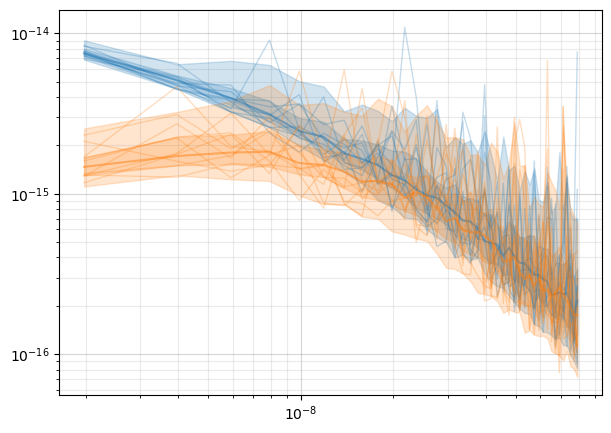

In [ ]:
fig, ax = plot.figax()
plot.draw_gwb(ax, fobs_cents, gwbs[0])
plot.draw_gwb(ax, fobs_cents, gwbs[1])
plt.show()

In [ ]:
# from pathlib import Path
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import numpy as np

# figsize = 6
# fontsize = 13

# mpl.style.use('default')   # avoid dark backgrounds from dark theme vscode
# plt.rcParams['axes.grid'] = True
# plt.rcParams['grid.alpha'] = 0.25
# plt.rcParams["mathtext.fontset"] = "cm"
# plt.rcParams["font.family"] = "serif"
# plt.rcParams["font.size"] = fontsize
# plt.rcParams["legend.fontsize"] = fontsize*0.8
# plt.rcParams["legend.handlelength"] = 1.5
# plt.rcParams["lines.solid_capstyle"] = 'round'
# mpl.rcParams['xtick.labelsize'] = fontsize*0.8
# mpl.rcParams['ytick.labelsize'] = fontsize*0.8

# figsize_single = [figsize, figsize * (np.sqrt(5)-1)/2]
# adjust_single = dict(left=0.12, bottom=0.15, right=0.95, top=0.95)

# figsize_double = [2*fss for fss in figsize_single]
# adjust_double = dict(left=0.08, bottom=0.10, right=0.98, top=0.95)

# # ==== Single Width (one-column)

# fig, ax = plt.subplots(figsize=figsize_single)
# plt.subplots_adjust(**adjust_single)
# ax.set(xlabel='x-label', yscale='log', ylabel='y-label')

# xx = np.sort(np.random.uniform(-10.0, +10.0, 1000))
# yy = np.sin(xx) / xx + 0.05*xx
# yy = np.exp(yy)
# zz = yy + np.random.normal(0.0, 0.1, xx.size)

# plt.plot(xx, yy, ls='-', color='0.75', alpha=0.5, lw=4.0)
# plt.plot(xx, yy, ls='-', color='0.25', alpha=0.85, label='$f(x) = \sin(x)/x + x$')
# plt.scatter(xx, zz, alpha=0.25, s=8)

# ax.legend()
# plt.show()
# fig.savefig("test_single.pdf")

# # ==== Double Wide (two-column)

# fig, ax = plt.subplots(figsize=figsize_double)
# plt.subplots_adjust(**adjust_double)
# ax.set(xlabel='x-label', yscale='log', ylabel='y-label')

# xx = np.sort(np.random.uniform(-10.0, +10.0, 10000))
# yy = np.sin(xx) / xx + 0.05*xx
# yy = np.exp(-yy)
# zz = yy + np.random.normal(0.0, 0.05, xx.size)

# plt.plot(xx, yy, ls='-', color='0.75', alpha=0.5, lw=4.0)
# plt.plot(xx, yy, ls='-', color='0.25', alpha=0.85, label='$f(x) = \sin(x)/x + x$')
# plt.scatter(xx, zz, alpha=0.25, s=8)

# ax.legend()
# fig.savefig("test_double.pdf")
# plt.show()

In [ ]:
import sys
import argparse
from mpi4py import MPI
comm = MPI.COMM_WORLD
# temp_path = "../scripts/"
# if temp_path not in sys.path:
#     sys.path.append(temp_path)
# from gen_lib_sams import _setup_argparse

# Manually run test library

## Run the components for a single simulation

In [ ]:
args = holo.librarian._setup_argparse(
    comm,
    # ["PS_Broad_Uniform_02B", "../output/broad-uniform-02b_test"],
    ["PS_Uniform_07A", "../output/uniform-07a_test"],
    namespace=argparse.Namespace(nsamples=10, nreals=100, sam_shape=60, recreate=True),
)
args.log = log
print(args)

space = getattr(holo.param_spaces, args.param_space)
space = space(args.log, args.nsamples, args.sam_shape, args.seed)
np.random.seed(12345)
pnum = np.random.choice(args.nsamples)
print(f"{pnum=}")


In [ ]:
# pta_dur = args.pta_dur * YR
# nfreqs = args.nfreqs
# hifr = nfreqs/pta_dur
# pta_cad = 1.0 / (2 * hifr)
# fobs_cents = holo.utils.nyquist_freqs(pta_dur, pta_cad)
# fobs_edges = holo.utils.nyquist_freqs_edges(pta_dur, pta_cad)

# print(space.param_dict(pnum))

# sam, hard = space(pnum)
# gwb = sam.gwb(fobs_edges, realize=args.nreals, hard=hard)
# print(f"{utils.stats(gwb)=}")


In [ ]:
rv = holo.librarian.run_sam_at_pspace_num(args, space, pnum)

In [ ]:
fname = ("/Users/lzkelley/Programs/nanograv/holodeck/output/uniform-07a_test/sims/"
         "lib-sams_gwb-ss__p000002.npz")
data = np.load(fname)
print(list(data.keys()))
bg = data['hc_bg']
ss = data['hc_ss']
gwb = data['gwb']
print(bg.shape, ss.shape, gwb.shape)
test = np.sum(ss**2, axis=-1)
test = np.sqrt(bg**2 + test)
print(test.shape, gwb.shape)
print(utils.stats(gwb))
print(utils.stats(test))

In [ ]:
plaw_nbins, fit_plaw, fit_plaw_med = holo.librarian.fit_spectra_plaw(fobs_cents, gwb, holo.librarian.FITS_NBINS_PLAW)
turn_nbins, fit_turn, fit_turn_med = holo.librarian.fit_spectra_turn(fobs_cents, gwb, holo.librarian.FITS_NBINS_TURN)

fit_data = dict(
    fit_plaw_nbins=plaw_nbins, fit_plaw=fit_plaw, fit_plaw_med=fit_plaw_med,
    fit_turn_nbins=turn_nbins, fit_turn=fit_turn, fit_turn_med=fit_turn_med,
)


In [ ]:
fig = holo.librarian.make_gwb_plot(fobs_cents, gwb, fit_data)

## run all sample points

In [ ]:
args = _setup_argparse(
    ["PS_Uniform_07_GW", "../output/uniform-07_gw_test"],
    namespace=argparse.Namespace(nsamples=10, nreals=4, sam_shape=11),
    )
args.log = log
print(args)

space = getattr(holo.param_spaces, args.param_space)
space = space(args.log, args.nsamples, args.sam_shape, args.seed)
space_fname = space.save(args.output)
log.info(f"saved parameter space {space} to {space_fname}")

for pnum in tqdm.trange(args.nsamples):
    holo.librarian.run_sam_at_pspace_num(args, space, pnum)

In [ ]:
log.setLevel(log.DEBUG)
lib_fname = holo.librarian.sam_lib_combine(args.output, log, path_sims=args.output_sims)

In [ ]:
with h5py.File(lib_fname, 'r') as data:
    keys = list(data.keys())

    print("datasets:")
    for kk in keys:
        print("\t", kk, data[kk].shape)
        print("\t\t", utils.stats(data[kk]))

    print("attributes:")
    keys = list(data.attrs.keys())
    for kk in keys:
        print("\t", kk, data.attrs[kk])

In [ ]:
with h5py.File(lib_fname, 'r') as data:
    xx = data['fobs'][()] * YR
    gwb = data['gwb'][()]
    hc_bg = data['hc_bg'][()]
    hc_ss = data['hc_ss'][()]
    print(gwb.shape, hc_bg.shape, hc_ss.shape)
    
    hc_gwb = np.sqrt(hc_bg **2 + np.sum(hc_ss**2, axis=-1))
    diff = (gwb - hc_gwb)/hc_gwb
    print(utils.stats(diff))
    
    for ii in range(10):
        fig, ax = plot.figax()
        aa = gwb[ii]
        bb = hc_gwb[ii]
        ax.plot(xx, np.median(aa, axis=-1))
        ax.plot(xx, np.median(bb, axis=-1))
    

In [ ]:
breaker()

# Param_Space Class

In [ ]:
class PS_Test(holo.librarian._Param_Space):
    
    def __init__(self, log, nsamples, sam_shape, seed):
        super().__init__(
            log, nsamples, sam_shape, seed,
            gsmf_phi0=holo.librarian.PD_Normal(-2.77, 0.3),
        )
        return
    
    def model_for_number(self, num):
        params = self.param_dict(num)
        gsmf = holo.sam.GSMF_Schechter(phi0=params['gsmf_phi0'])
        # CONSTRUCT SAM and HARD models here
        sam = holo.sam.Semi_Analytic_Model(
            ZERO_DYNAMIC_STALLED_SYSTEMS = False,
            ZERO_GMT_STALLED_SYSTEMS = True,
        )
        hard = holo.hardening.Hard_GW
        return sam, hard
    
test = PS_Test(log, 4, 10, 12345)
fobs_edges = utils.nyquist_freqs_edges()
fobs_cents = utils.midpoints(fobs_edges, log=False)
sam, hard = test.model_for_number(0)
gwb = sam.gwb(fobs_edges, hard=hard, realize=20)
plot.plot_gwb(fobs_cents, gwb)
plt.show()

In [ ]:
class PS_Test(holo.librarian._Param_Space):
    
    def __init__(self, log, nsamples, sam_shape, seed):
        super().__init__(
            log, nsamples, sam_shape, seed,
            gsmf_phi0=holo.librarian.PD_Normal(-2.77, 0.3),
        )
        return
    
    def model_for_number(self, num):
        params = self.param_dict(num)
        gsmf = holo.sam.GSMF_Schechter(phi0=params['gsmf_phi0'])

        sam = holo.sam.Semi_Analytic_Model(
            ZERO_DYNAMIC_STALLED_SYSTEMS = True,
            ZERO_GMT_STALLED_SYSTEMS = False,
            shape=self.sam_shape
        )
        # hard = holo.hardening.Hard_GW
        hard = holo.hardening.Fixed_Time.from_sam(sam, 0.01*GYR)
        return sam, hard
    
test = PS_Test(log, 4, 10, 12345)
fobs_edges = utils.nyquist_freqs_edges()
fobs_cents = utils.midpoints(fobs_edges, log=False)
sam, hard = test.model_for_number(0)
gwb = sam.gwb(fobs_edges, hard=hard, realize=20)
plot.plot_gwb(fobs_cents, gwb)
plt.show()

In [ ]:
class PS_Test(holo.librarian._Param_Space):
    
    def __init__(self, log, nsamples, sam_shape, seed):
        super().__init__(
            log, nsamples, sam_shape, seed,
            par1=holo.librarian.PD_Uniform(-1.0, 1.0),
            par2=holo.librarian.PD_Uniform_Log(10.0, 1000.0),
            par3=holo.librarian.PD_Normal(-3.0, 0.4),
        )
        return
    
    def model_for_number(self, num):
        # CONSTRUCT SAM and HARD models here
        sam = None
        hard = None
        return sam, hard
    
nsamps = 1000
test = PS_Test(log, nsamps, 50, 12345)

for ii in np.random.choice(nsamps, 4, replace=False):
    print(f"\ntest sample {ii:4d} :: {test.params(ii)}  \n    {test.param_dict(ii)}")

fig, axes = plt.subplots(figsize=[10, 5], ncols=test.ndims)
for ii, ax in enumerate(axes):
    ax.grid(True, alpha=0.25)
    kale.dist1d(test._params[:, ii], ax=ax, density=False)
    
plt.show()


## Saving a _Param_Space class

In [ ]:
space = holo.param_spaces.PS_Broad_Uniform_02B(log, 100, (11, 12, 13), None)
output = Path('.').resolve()
print(output)
fname = space.save(output)

In [ ]:
check = holo.param_spaces.PS_Broad_Uniform_02B.from_save(fname, log)

In [ ]:
for kk in dir(space):
    if kk.startswith("__") or kk in ['_random_state']:
        continue
    v1 = getattr(space, kk)
    v2 = getattr(check, kk)
    print(kk, type(v1), type(v2))
    if callable(v1):
        continue
    test = (v1 == v2)
    print("\t", np.all(test))
    assert np.all(test)
    print(np.all(test))

## Generate new SAMs from existing PSpace

# Param_Dist Classes

## Normal

In [ ]:
PD_Normal = holo.librarian.PD_Normal

## LinLog

In [ ]:
test = holo.librarian.PD_Lin_Log(0.01, 100.0, 0.1, 0.5)
xx = np.linspace(0.0, 1.0, 10000)
yy = test(xx)
print(utils.minmax(yy))
plt.loglog(xx, yy)
ax = plt.gca()
ax.axhline(test._crit, color='r', ls=':')
ax.axvline(test._lofrac, color='r', ls=':')
plt.show()

### Change the fraction of population below/above cutoff

In [ ]:
NUM = int(1e4)
crit = 0.1

BINS = 20
e1 = np.linspace(0.01, crit, BINS, endpoint=False)
e2 = np.logspace(*np.log10([crit, 100.0]), BINS)
edges = np.concatenate([e1, e2])

fig, ax = plot.figax(scale='log')
for frac in [0.2, 0.5, 0.8]:
    test = holo.librarian.PD_Lin_Log(0.01, 100.0, crit, frac)
    xx = test(np.random.uniform(0.0, 1.0, size=NUM))
    kale.dist1d(xx, ax=ax, edges=edges, density=True, probability=False)
    obs_frac = np.count_nonzero(xx < crit) / xx.size
    print(f"target:{frac:.2f}, result:{obs_frac:.4f}", 1.0/np.sqrt(NUM))
    assert np.isclose(frac, obs_frac, atol=2.0/np.sqrt(NUM))
    
plt.show()

### Change the location of the cutoff

In [ ]:
NUM = int(1e4)
frac = 0.5

BINS = 20
edges = np.logspace(*np.log10([0.01, 100.0]), 2*BINS)

fig, ax = plot.figax(scale='log')
for crit in [0.1, 1.0, 10.0]:
    test = holo.librarian.PD_Lin_Log(0.01, 100.0, crit, frac)
    xx = test(np.random.uniform(0.0, 1.0, size=NUM))
    kale.dist1d(xx, ax=ax, edges=edges, density=True, probability=False)
    obs_frac = np.count_nonzero(xx < crit) / xx.size
    print(f"target:{frac:.2f}, result:{obs_frac:.4f}", 1.0/np.sqrt(NUM))
    assert np.isclose(frac, obs_frac, atol=2.0/np.sqrt(NUM))
    
plt.show()

## LogLin

In [ ]:
test = holo.librarian.PD_Log_Lin(0.01, 100.0, 0.1, 0.5)
xx = np.linspace(0.0, 1.0, 10000)
yy = test(xx)
print(utils.minmax(yy))
plt.loglog(xx, yy)
ax = plt.gca()
ax.axhline(test._crit, color='r', ls=':')
ax.axvline(test._lofrac, color='r', ls=':')
plt.show()

### Change the fraction of population below/above cutoff

In [ ]:
NUM = int(2e4)
crit = 0.1

BINS = 30
edges = np.logspace(*np.log10([0.01, 100.0]), BINS)

fig, ax = plot.figax(scale='log')
for frac in [0.2, 0.5, 0.8]:
    test = holo.librarian.PD_Log_Lin(0.01, 100.0, crit, frac)
    xx = test(np.random.uniform(0.0, 1.0, size=NUM))
    kale.dist1d(xx, ax=ax, edges=edges, density=True, probability=False)
    obs_frac = np.count_nonzero(xx < crit) / xx.size
    print(f"target:{frac:.2f}, result:{obs_frac:.4f}", 1.0/np.sqrt(NUM))
    assert np.isclose(frac, obs_frac, atol=2.0/np.sqrt(NUM))
    
plt.show()

### Change the location of the cutoff

In [ ]:
NUM = int(2e4)
frac = 0.5

BINS = 20

edges = np.logspace(*np.log10([0.01, 100.0]), 2*BINS)

fig, ax = plot.figax(scale='log')
for crit in [0.1, 1.0, 10.0]:
    test = holo.librarian.PD_Log_Lin(0.01, 100.0, crit, frac)
    xx = test(np.random.uniform(0.0, 1.0, size=NUM))
    kale.dist1d(xx, ax=ax, edges=edges, density=True, probability=False)
    obs_frac = np.count_nonzero(xx < crit) / xx.size
    print(f"target:{frac:.2f}, result:{obs_frac:.4f}", 1.0/np.sqrt(NUM))
    assert np.isclose(frac, obs_frac, atol=2.0/np.sqrt(NUM))
    
plt.show()

## Piecewise Uniform

In [ ]:
edges = [-1.0, 5.0, 6.0, 7.0]
test = holodeck.librarian.PD_Piecewise_Uniform_Mass(edges, [1.0, 2.0, 1.0])

xx = np.random.uniform(size=1000)
xx = np.sort(xx)
yy = test(xx)
print(utils.minmax(yy))
x, y, _ = plt.hist(yy, histtype='step', density=True, bins=edges)
ax = plt.gca()
plt.show()

In [ ]:
edges = [-1.0, 5.0, 6.0, 7.0]
test = holodeck.librarian.PD_Piecewise_Uniform_Density(edges, [1.0, 2.0, 1.0])

xx = np.random.uniform(size=1000)
xx = np.sort(xx)
yy = test(xx)
print(utils.minmax(yy))
x, y, _ = plt.hist(yy, histtype='step', density=True, bins=edges)
ax = plt.gca()
plt.show()

In [ ]:
edges = [0.1, 1.0, 2.0, 9.0, 11.0]
test = holodeck.librarian.PD_Piecewise_Uniform_Density(edges, [2.5, 1.5, 1.0, 1.5])

xx = np.random.uniform(size=2000)
xx = np.sort(xx)
yy = test(xx)
print(utils.minmax(yy))
ax = plt.gca()
scale = 'log'
scale = 'linear'
ax.set(xscale=scale)
xx = kale.utils.spacing(edges, scale, num=20)
ax.hist(yy, histtype='step', density=True, bins=xx)
# tw = ax.twinx()
# tw.hist(yy, histtype='step', density=True, bins=30)
plt.show()

In [ ]:
# test = holodeck.librarian.PD_Piecewise_Uniform_Density([-3.5, -3.0, -2.0, -1.5], [2.0, 1.0, 2.0])   # gsmf_phi0
# test = holodeck.librarian.PD_Piecewise_Uniform_Density([10.5, 11.0, 12.0, 12.5], [2.0, 1.0, 2.0])   # gsmf_mchar0_log10
test = holodeck.librarian.PD_Piecewise_Uniform_Density([7.5, 8.0, 9.0, 9.5], [1.5, 1.0, 2.0])   # mmb_mamp_log10

xx = np.random.uniform(size=2000)
xx = np.sort(xx)
yy = test(xx)
print(utils.minmax(yy))
ax = plt.gca()
scale = 'log'
scale = 'linear'
ax.set(xscale=scale)
xx = kale.utils.spacing(yy, scale, num=20)
print(xx)
ax.hist(yy, histtype='step', density=True, bins=xx)
# tw = ax.twinx()
# tw.hist(yy, histtype='step', density=True, bins=30)
plt.show()

# Fit Spectra

In [ ]:
lib_path = (
    "/Users/lzkelley/Programs/nanograv/15yr_astro_libraries/"
    # "uniform-05a_2023-05-02_n1000_r100_f40"
    # "uniform-07a_new_n500_r100_f40"
    "uniform-07a_new_n500_r100_f40"
    "/sam_lib.hdf5"
)
lib_path = Path(lib_path)
assert lib_path.exists()
print(lib_path.parent)

library = h5py.File(lib_path, 'r')
print(list(library.keys()))
gwb = library['gwb'][()]
fobs = library['fobs'][()]
print(f"{gwb.shape=} {utils.stats(gwb)=}")
params = library['sample_params'][()]
param_names = library.attrs['param_names'].astype('str')
print(param_names)
for ii, name in enumerate(param_names):
    print(f"{ii=}, {name=}, {params[ii].shape=}, {utils.minmax(params[ii])=}")

In [ ]:
nsamps, nfreqs, nreals = gwb.shape
print(f"{nsamps=} {nfreqs=} {nreals=}")
# seed = np.random.randint(0, 999999)
# seed = 419587
# print(f"{seed=}")
# np.random.seed(seed)
# ss = np.random.choice(nsamps)
# rr = np.random.choice(nreals)
ss = 129
rr = 51
print(f"{ss=}, {rr=}")

xx = fobs
hc = gwb[ss, :, rr]

fig, ax = plot.figax()

plot.draw_gwb(ax, xx, gwb[ss, :, :])
ax.plot(xx, hc, 'k-', alpha=0.5)

plt.show()


In [ ]:
rho = utils.char_strain_to_rho(fobs, hc, 1/fobs[0])
psd = utils.char_strain_to_psd(fobs, hc)

fig, axes = plot.figax(figsize=[12, 4], ncols=3, xscale='log')
values = [hc, rho, psd]
names = ["hc", "rho", "psd"]

for ii, ax in enumerate(axes):
    yy = values[ii]
    ax.plot(xx, yy, alpha=0.75)
    ax.set_title(names[ii], fontsize=10)

    fits, func = utils.fit_powerlaw_psd(xx, yy, 1.0/YR)
    zz = func(xx, *fits)
    ax.plot(xx, zz, ls='--', alpha=0.5)
    
    fits, func = utils.fit_turnover_psd(xx, yy, 1.0/YR)
    zz = func(xx, *fits)
    ax.plot(xx, zz, ls='--', alpha=0.5)    

    
plt.show()

In [ ]:
psd = utils.char_strain_to_psd(fobs[np.newaxis, :, np.newaxis], library['gwb'][()])
nbins_list, fits_plaw = holo.librarian.fit_spectra_plaw(fobs, psd)

In [ ]:
kale.plot.dist2d?

In [ ]:
fits_plaw_med = np.median(fits_plaw, axis=1)

fig, axes = plt.subplots(figsize=[12, 4], ncols=5)
for ii in range(5):
    ax = axes[ii]
    temp = fits_plaw_med[:, ii, :].T
    ax.set_title(f"nbins={nbins_list[ii]}", fontsize=10)
    kale.plot.dist2d(temp, ax=ax)

plt.show()

In [ ]:
fits_plaw_med = np.median(fits_plaw, axis=1)

fig, ax = plt.subplots(figsize=[6, 6])
ax.axhline(-13/3, ls='--', color='0.5')
ax.axvline(-15, ls='--', color='0.5')
for ii in range(5):
    temp = fits_plaw_med[:, ii, :].T
    kale.plot.dist2d(temp, ax=ax, hist=False, scatter=False, sigmas=[1, 2, 3], median=False)

plt.show()